In [1]:
#import relevant libraries: pip install re, pip install natsort, pip install plotly==5.10.0
import sys
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt8
import math
import matplotlib.pyplot as plt
import decimal
import re
from natsort import index_natsorted
import dabest
#import dabest_jck
import itertools
import NLCLIMB 
import NLGRAPHS
import NLMATH

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objects import Layout
from scipy.optimize import curve_fit

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#initial file processing

computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
computer3 = "D:"
computer4 = "C:\\Users\\Star"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"

openPath = computer4 + filedir

# openPath = "C:\\Users\\User\\ACC Lab Dropbox\\ACC Lab\\Zhiyi\\NL's amended data\\Compilation\\"
files = os.listdir(openPath)

#identifying genotypes
responder = "ACR"
driver = "VT999036"
wt = "w1118"
transgenic = driver + " x " + responder
filename = openPath + transgenic + ".csv"
filenamewt = openPath + wt+"_"+ transgenic + ".csv"

print(filename)
print(filenamewt)

dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.generation(exptdf, driver)
dfwt = NLCLIMB.generation(wtdf, wt)

C:\Users\Star\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\VT999036 x ACR.csv
C:\Users\Star\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\w1118_VT999036 x ACR.csv


In [3]:
def counterfall(df_rr1, nnumber, nnumberwt, phase): #phase is either "wt" or "expt"
    
    df_rr1['integer'] = df_rr1['value'].astype(int)
    count_wtfull = df_rr1[(df_rr1["Type"] == phase)]['integer'].value_counts()
    count_wtfull = count_wtfull.rename_axis('integer').reset_index(name='counts')

    if phase == "WT":
        dvis = nnumberwt
    else:
        dvis = nnumber
    count_wtfull['counts'] = (count_wtfull['counts']/dvis)*100
    
    listofval = [x for x in [float(x) for x in range(0,23)] if x not in set(count_wtfull['integer'])]
    count_wtfull = pd.concat([count_wtfull, pd.DataFrame({"integer" :listofval})], ignore_index = True)

    count_wtfull = count_wtfull.sort_values(by=['integer']).reset_index(drop = True)
    count_wtfull['counts'] = count_wtfull['counts'].replace(np.nan, 0)
    count_wtfull['name'] = phase
    
    return count_wtfull

def removingextraline(df1):  #only takes 22 seconds of the entire timeline
    df = df1.reset_index(drop=True)
    df['Seconds'] = round(df['Seconds'],1)
    line = df[(df['Seconds'] > 22.0)].index
    df = df.drop(line)
    
    return df

# **TOTAL calculations for graphs**



In [4]:
#Y position
df_de = NLMATH.calcgraph(dfexpt,"Y.*")
df_meande=NLMATH.meangraph(df_de)
df_dw = NLMATH.calcgraph(dfwt,"Y.*")
df_meandw=NLMATH.meangraph(df_dw)

#speed
df_se = NLMATH.calcgraph(dfexpt, "Velocity.*")
df_meanse = NLMATH.meangraph(df_se)
df_sw = NLMATH.calcgraph(dfwt, "Velocity.*")
df_meansw = NLMATH.meangraph(df_sw)

#Falling
df_fed = NLMATH.fallcalc(dfexpt, "Dark")
df_fel = NLMATH.fallcalc(dfexpt, "Full")
df_fer = NLMATH.fallcalc(dfexpt, "Recovery")

df_fwd = NLMATH.fallcalc(dfwt, "Dark")
df_fwl = NLMATH.fallcalc(dfwt, "Full")
df_fwr = NLMATH.fallcalc(dfwt, "Recovery")

#Falling
df_re = NLMATH.rastergraph(dfexpt)
df_rw = NLMATH.rastergraph(dfwt)
df_re['Type'] = "EXPT"
df_rw['Type'] = "WT"

df_rrdark = pd.concat([df_re[(df_re['ExperimentState']== 'Dark')], df_rw[(df_rw['ExperimentState']== 'Dark')]]).reset_index(drop=True)
#df_rr['list']= range(1,len(df_rr)+1)
df_rrfull = pd.concat([df_re[(df_re['ExperimentState']== 'Full')], df_rw[(df_rw['ExperimentState']== 'Full')]]).reset_index(drop=True)
#df_rr1['list']= range(1,len(df_rr1)+1)
df_rrrec = pd.concat([df_re[(df_re['ExperimentState']== 'Recovery')], df_rw[(df_rw['ExperimentState']== 'Recovery')]]).reset_index(drop=True)

## matplotlib version

C:\Users\Star\AppData\Local\Temp\ipykernel_21396\1980255399.py:177: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figfirstplot.show()


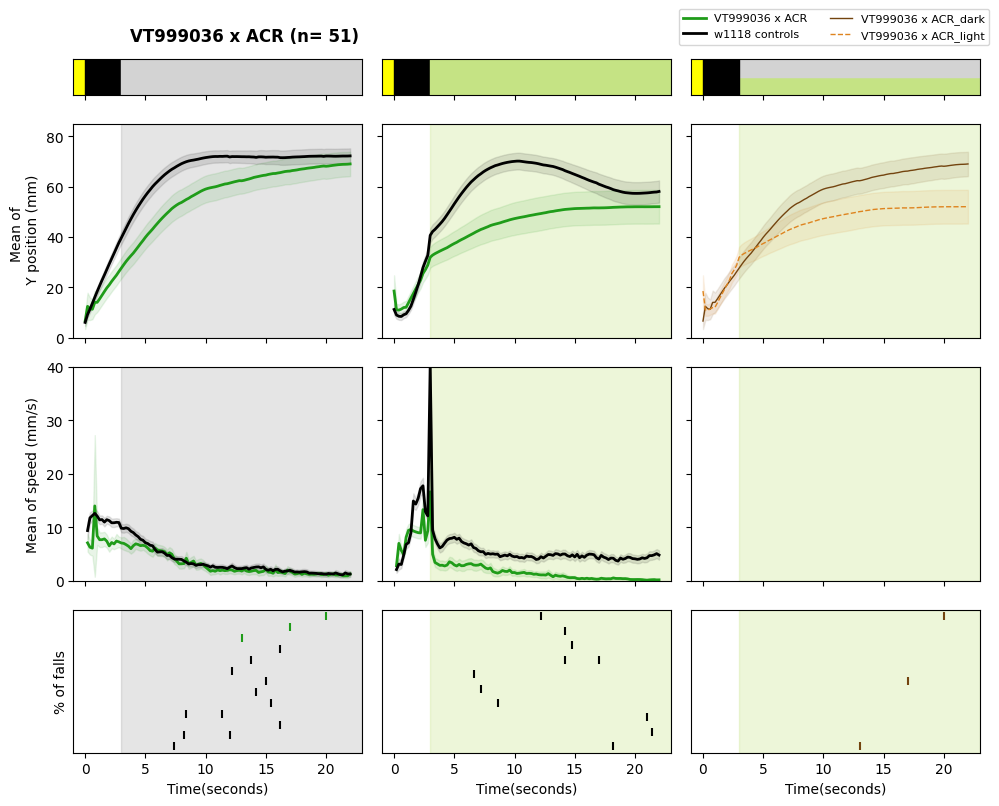

In [46]:

import matplotlib.patches as patches
figfirstplot, axs = plt.subplots(4, 3, figsize=(10, 8 ),sharex = "col", gridspec_kw={'height_ratios': [1,6,6,4]}) #sharey = row


df3 = removingextraline(df_meande)
df4 = removingextraline(df_meandw)
df5 = removingextraline(df_meanse)
df6 = removingextraline(df_meansw)


driver = transgenic
nnumber = int(0.20*(len(dfexpt.columns)-2))
nnumberwt = int(0.20*(len(dfwt.columns)-2))
time = df3.loc[df3.ExperimentState == "Dark", 'Seconds']
time2 = df4.loc[df4.ExperimentState == "Dark", 'Seconds']


if "ACR" in responder:
    barcolr = "#1f9c19"
    patchcolor = "#c5e384"
    compdark = "#73440f"
    complight = "#de841f"
    
    
if "Chrimson2" in responder:
    barcolr = "#c30010"
    patchcolor = "salmon"
    compdark = "#3A025B"
    complight = "#AF69ED"

#df3 = expt
#df4 = wt

#cartoon
axs[0,0].axvspan(-1,0, color = "#FFFF00", label = "_nolegend_")
axs[0,0].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,0].axvspan(3,23, color = "lightgray" , label = "_nolegend_")

axs[0,1].axvspan(-1,0, color = "#FFFF00" , label = "_nolegend_")
axs[0,1].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,1].axvspan(3,23, color = patchcolor, label = "_nolegend_")

axs[0,2].axvspan(-1,0, color = "#FFFF00" , zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(0,3, color = "#000000", zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(3,23, color = patchcolor, label = "_nolegend_")
axs[0,2].axhline(y=0.75, color='lightgray', linewidth =14, zorder = 1, label = "_nolegend_" )

axs[0,0].get_yaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
axs[0,2].get_yaxis().set_visible(False)

#y pos    

axs[1,0].axvspan(3,23, alpha=0.1, color = "#000000", label = "_nolegend_")

axs[1,0].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = "driver")
axs[1,0].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1, 0].plot(time, df4.loc[df4.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[1,0].fill_between(time, (df4.loc[df4.ExperimentState == "Dark", 'mean']-df4.loc[df4.ExperimentState == "Dark", 'CI']), 
                      df4.loc[df4.ExperimentState == "Dark", 'mean']+df4.loc[df4.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[1,0].set(xlabel='Time(seconds)', ylabel='Mean of \n Y position (mm)')
axs[1,1].set(xlabel='Time(seconds)')


axs[1,1].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,1].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2, label = "_nolegend_")
axs[1,1].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1,1].plot(time, df4.loc[df4.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2, label = "_nolegend_")
axs[1,1].fill_between(time, (df4.loc[df4.ExperimentState == "Full", 'mean']-df4.loc[df4.ExperimentState == "Full", 'CI']), 
                      df4.loc[df4.ExperimentState == "Full", 'mean']+df4.loc[df4.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")

#expt comaparison

axs[1,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = compdark, linewidth = 1, label = "driver" + "_dark")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= compdark, alpha=.1, label = "_nolegend_")

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = complight, linewidth = 1, linestyle='dashed', label = "driver" + "_light")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= complight, alpha=.1, label = "_nolegend_")


axs[1,0].set_ylim([0, 85])
axs[1,1].set_ylim([0, 85])
axs[1,2].set_ylim([0, 85])

#speed
time = df5.loc[df5.ExperimentState == "Dark", 'Seconds']
time2 = df6.loc[df6.ExperimentState == "Dark", 'Seconds']

axs[2,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[2,1].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[2,0].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = driver)
axs[2,0].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1,  label = "_nolegend_")
axs[2,0].plot(time, df6.loc[df6.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[2,0].fill_between(time, (df6.loc[df6.ExperimentState == "Dark", 'mean']-df6.loc[df6.ExperimentState == "Dark", 'CI']), 
                      df6.loc[df6.ExperimentState == "Dark", 'mean']+df6.loc[df6.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[2,0].set(xlabel='Time(seconds)', ylabel='Mean of speed (mm/s)')
axs[2,1].set(xlabel='Time(seconds)')



axs[2,1].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2)
axs[2,1].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1)
axs[2,1].plot(time, df6.loc[df6.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2)
axs[2,1].fill_between(time, (df6.loc[df6.ExperimentState == "Full", 'mean']-df6.loc[df6.ExperimentState == "Full", 'CI']), 
                      df6.loc[df6.ExperimentState == "Full", 'mean']+df6.loc[df6.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1)

#expt comaparison

axs[2,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

 

axs[2,0].set_ylim([0, 40])
axs[2,1].set_ylim([0, 40])
axs[2,2].set_ylim([0, 40])

#raster
count_wtfull = df_rrfull[(df_rrfull["Type"] == "WT")]
count_exptfull = df_rrfull[(df_rrfull["Type"] == "EXPT")]
count_wtdark = df_rrdark[(df_rrdark["Type"] == "WT")]
count_exptdark = df_rrdark[(df_rrdark["Type"] == "EXPT")]

axs[3,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[3,1].axvspan(3,23, alpha=0.3, color = patchcolor)
axs[3,2].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[3,0].scatter(count_wtdark['value'], y= count_wtdark['variable'], s = 30, marker = "|", color = "#000000")
axs[3,0].scatter(count_exptdark['value'], y= count_exptdark['variable'], s = 30, marker = "|", color = barcolr)

axs[3,1].scatter(count_wtfull['value'], y= count_wtfull['variable'], s = 30, marker = "|", color = "#000000")
axs[3,1].scatter(count_exptfull['value'], y= count_exptfull['variable'], s = 30, marker = "|", color = barcolr)

#special measures
comp_dark = count_exptdark.copy()
comp_light = count_exptfull.copy()
comp_dark['special'] = "Dark_" +  comp_dark['variable']
comp_light['special'] = "ALight_" +  comp_light['variable']

axs[3,2].scatter(comp_dark['value'], y= comp_dark['special'], s = 30, marker = "|", color = compdark)
axs[3,2].scatter(comp_light['value'], y= comp_light['special'], s = 30, marker = "|", color = complight)


axs[3,0].set(xlabel='Time(seconds)', ylabel='% of falls')
axs[3,1].set(xlabel='Time(seconds)')
axs[3,2].set(xlabel='Time(seconds)')

axs[3,0].set_yticks([], minor=False)
axs[3,1].set_yticks([], minor=False)
axs[3,2].set_yticks([], minor=False)


#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-1,23])

    
figfirstplot.suptitle(t = driver  + " (n= " + str(nnumber) + ")", fontweight='bold', x = 0.25)

#legend
labels = [driver, "w1118 controls", driver +"_dark", driver + "_light"]

figfirstplot.legend(labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=2, bbox_transform=figfirstplot.transFigure, prop={'size': 8})

figfirstplot.tight_layout()

figfirstplot.show()

## additional columns

In [5]:
def downsampling_raster(dfexpt, samplenumber):
    from sklearn.utils import resample

    phase= ["Dark", "Full", 'Recovery']
    dfn = pd.DataFrame()
    for n in phase:
        dta= dfexpt[(dfexpt['ExperimentState'] == n)].copy()
        dftot2 = pd.DataFrame()
        if n == "Full":
            dta['Seconds'] -= 23
        if n == "Recovery":
            dta['Seconds'] -= 46       

        downsampled_df1 = resample(np.transpose(dta.filter(regex="Fall.*")), 
                replace=False, 
                n_samples=samplenumber, random_state=42)
        
        dftot2 = pd.concat([dta['Seconds'], np.transpose(downsampled_df1)], axis = 1).reset_index(drop=True)
        dftot2 = dftot2.sort_index(axis=1)

        dftesting = dftot2.copy()
        dfuu = pd.DataFrame()
        for r in dftot2.iloc[:,1:].columns:
            df_temp = pd.DataFrame()
            df_temp['Time ' + r] = [0]*len(dftot2)
            dftesting = pd.concat([dftesting,df_temp], axis = 1)
            dftesting.loc[(dftot2[r]>0), ['Time ' +r]] = dftesting['Seconds']
            dftesting2 = dftesting.filter(regex="Time .*")
            dfuu = pd.melt(dftesting2)
            dfuu["ExperimentState"] = n
        dfn = pd.concat([dfn, dfuu])
        dfu2 = dfn[dfn['value'] > 0].reset_index(drop=True)  

    return dfu2

In [6]:
df_downsample_re = downsampling_raster(dfexpt, 50)
df_downsample_rw = downsampling_raster(dfwt, 100)
df_downsample_re['Type'] = "EXPT"
df_downsample_rw['Type'] = "WT"

df_downsample_rrdark = pd.concat([df_downsample_re[(df_downsample_re['ExperimentState']== 'Dark')], df_downsample_rw[(df_downsample_rw['ExperimentState']== 'Dark')]]).reset_index(drop=True)
#df_rr['list']= range(1,len(df_rr)+1)
df_downsample_rrfull = pd.concat([df_downsample_re[(df_downsample_re['ExperimentState']== 'Full')], df_downsample_rw[(df_downsample_rw['ExperimentState']== 'Full')]]).reset_index(drop=True)
#df_rr1['list']= range(1,len(df_rr1)+1)
df_downsample_rrrec = pd.concat([df_downsample_re[(df_downsample_re['ExperimentState']== 'Recovery')], df_downsample_rw[(df_downsample_rw['ExperimentState']== 'Recovery')]]).reset_index(drop=True)

C:\Users\Star\AppData\Local\Temp\ipykernel_21396\4260431440.py:209: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figfirstplot.show()


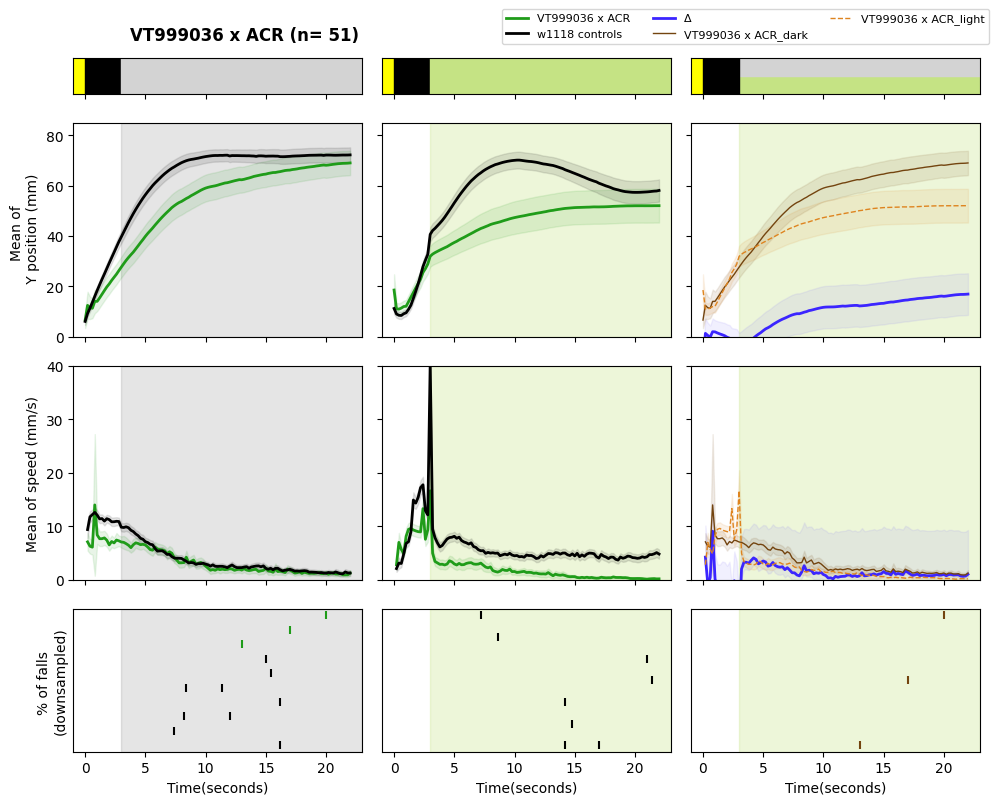

In [7]:
import matplotlib.patches as patches
figfirstplot, axs = plt.subplots(4, 3, figsize=(10, 8 ),sharex = "col", gridspec_kw={'height_ratios': [1,6,6,4]}) #sharey = row


df3 = removingextraline(df_meande)
df4 = removingextraline(df_meandw)
df5 = removingextraline(df_meanse)
df6 = removingextraline(df_meansw)


driver = transgenic
nnumber = int(0.20*(len(dfexpt.columns)-2))
nnumberwt = int(0.20*(len(dfwt.columns)-2))
time = df3.loc[df3.ExperimentState == "Dark", 'Seconds']
time2 = df4.loc[df4.ExperimentState == "Dark", 'Seconds']


if "ACR" in responder:
    barcolr = "#1f9c19"
    patchcolor = "#c5e384"
    compdark = "#73440f"
    complight = "#de841f"
    
    
if "Chrimson2" in responder:
    barcolr = "#c30010"
    patchcolor = "salmon"
    compdark = "#3A025B"
    complight = "#AF69ED"

#df3 = expt
#df4 = wt

#cartoon
axs[0,0].axvspan(-1,0, color = "#FFFF00", label = "_nolegend_")
axs[0,0].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,0].axvspan(3,23, color = "lightgray" , label = "_nolegend_")

axs[0,1].axvspan(-1,0, color = "#FFFF00" , label = "_nolegend_")
axs[0,1].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,1].axvspan(3,23, color = patchcolor, label = "_nolegend_")

axs[0,2].axvspan(-1,0, color = "#FFFF00" , zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(0,3, color = "#000000", zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(3,23, color = patchcolor, label = "_nolegend_")
axs[0,2].axhline(y=0.75, color='lightgray', linewidth =14, zorder = 1, label = "_nolegend_" )

axs[0,0].get_yaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
axs[0,2].get_yaxis().set_visible(False)

#y pos    

axs[1,0].axvspan(3,23, alpha=0.1, color = "#000000", label = "_nolegend_")

axs[1,0].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = "driver")
axs[1,0].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1, 0].plot(time, df4.loc[df4.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[1,0].fill_between(time, (df4.loc[df4.ExperimentState == "Dark", 'mean']-df4.loc[df4.ExperimentState == "Dark", 'CI']), 
                      df4.loc[df4.ExperimentState == "Dark", 'mean']+df4.loc[df4.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[1,0].set(xlabel='Time(seconds)', ylabel='Mean of \n Y position (mm)')
axs[1,1].set(xlabel='Time(seconds)')


axs[1,1].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,1].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2, label = "_nolegend_")
axs[1,1].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1,1].plot(time, df4.loc[df4.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2, label = "_nolegend_")
axs[1,1].fill_between(time, (df4.loc[df4.ExperimentState == "Full", 'mean']-df4.loc[df4.ExperimentState == "Full", 'CI']), 
                      df4.loc[df4.ExperimentState == "Full", 'mean']+df4.loc[df4.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")

#expt comparison

#extra calculation to account for delta line
mean_distmeandiff = df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Full", 'mean'].reset_index(drop=True)
mean_distci = abs(
    1.96*
    (np.sqrt(((df3.loc[df3.ExperimentState == "Dark", 'CI'])/1.96)**2 + ((df3.loc[df3.ExperimentState == "Full", 'CI'].reset_index(drop=True))/1.96)**2))
    )


axs[1,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,2].plot(time, mean_distmeandiff, color = "#3b25ff", linewidth = 2, label = "Δ")
axs[1,2].fill_between(time, mean_distmeandiff-mean_distci, mean_distmeandiff+mean_distci, color= "#7c6cfa", alpha=.1, label = "_nolegend_")

#together with differences

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = compdark, linewidth = 1, label = "driver" + "_dark")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= compdark, alpha=.1, label = "_nolegend_")

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = complight, linewidth = 1, linestyle='dashed', label = "driver" + "_light")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= complight, alpha=.1, label = "_nolegend_")



axs[1,0].set_ylim([0, 85])
axs[1,1].set_ylim([0, 85])
axs[1,2].set_ylim([0, 85])

#speed
time = df5.loc[df5.ExperimentState == "Dark", 'Seconds']
time2 = df6.loc[df6.ExperimentState == "Dark", 'Seconds']

axs[2,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[2,1].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[2,0].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = driver)
axs[2,0].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1,  label = "_nolegend_")

axs[2,0].plot(time, df6.loc[df6.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[2,0].fill_between(time, (df6.loc[df6.ExperimentState == "Dark", 'mean']-df6.loc[df6.ExperimentState == "Dark", 'CI']), 
                      df6.loc[df6.ExperimentState == "Dark", 'mean']+df6.loc[df6.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[2,0].set(xlabel='Time(seconds)', ylabel='Mean of speed (mm/s)')
axs[2,1].set(xlabel='Time(seconds)')


axs[2,1].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2)
axs[2,1].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1)
axs[2,1].plot(time, df6.loc[df6.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2)
axs[2,1].fill_between(time, (df6.loc[df6.ExperimentState == "Full", 'mean']-df6.loc[df6.ExperimentState == "Full", 'CI']), 
                      df6.loc[df6.ExperimentState == "Full", 'mean']+df6.loc[df6.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1)

#expt comaparison

#extra calculation to account for delta line
mean_speedmeandiff = df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Full", 'mean'].reset_index(drop=True)
mean_speedci = abs(
    1.96*
    (np.sqrt(((df5.loc[df5.ExperimentState == "Dark", 'CI'])/1.96)**2 + ((df5.loc[df5.ExperimentState == "Full", 'CI'].reset_index(drop=True))/1.96)**2))
    )

axs[2,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[2,2].plot(time, mean_speedmeandiff, color = "#3b25ff", linewidth = 2, label = "Δ ")
axs[2,2].fill_between(time, mean_speedmeandiff-mean_speedci, mean_speedmeandiff+mean_distci, color= "#7c6cfa", alpha=.1, label = "_nolegend_")

#together with differences

axs[2,2].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = compdark, linewidth = 1,  label = "driver" + "_dark")
axs[2,2].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= compdark, alpha=.1, label = "_nolegend_")

axs[2,2].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = complight, linewidth = 1, linestyle='dashed', label = "driver" + "_light")
axs[2,2].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= complight, alpha=.1, label = "_nolegend_")

axs[2,0].set_ylim([0, 40])
axs[2,1].set_ylim([0, 40])
axs[2,2].set_ylim([0, 40])

#raster
count_ds_wtfull = df_downsample_rrfull[(df_downsample_rrfull["Type"] == "WT")]
count_ds_exptfull = df_downsample_rrfull[(df_downsample_rrfull["Type"] == "EXPT")]
count_ds_wtdark = df_downsample_rrdark[(df_downsample_rrdark["Type"] == "WT")]
count_ds_exptdark = df_downsample_rrdark[(df_downsample_rrdark["Type"] == "EXPT")]

axs[3,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[3,1].axvspan(3,23, alpha=0.3, color = patchcolor)
axs[3,2].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[3,0].scatter(count_ds_wtdark['value'], y= count_ds_wtdark['variable'], s = 30, marker = "|", color = "#000000")
axs[3,0].scatter(count_ds_exptdark['value'], y= count_ds_exptdark['variable'], s = 30, marker = "|", color = barcolr)

axs[3,1].scatter(count_ds_wtfull['value'], y= count_ds_wtfull['variable'], s = 30, marker = "|", color = "#000000")
axs[3,1].scatter(count_ds_exptfull['value'], y= count_ds_exptfull['variable'], s = 30, marker = "|", color = barcolr)

#special measures
comp_ds_dark = count_ds_exptdark.copy()
comp_ds_light = count_ds_exptfull.copy()
comp_ds_dark['special'] = "Dark_" +  comp_ds_dark['variable']
comp_ds_light['special'] = "ALight_" +  comp_ds_light['variable']

axs[3,2].scatter(comp_ds_dark['value'], y= comp_ds_dark['special'], s = 30, marker = "|", color = compdark)
axs[3,2].scatter(comp_ds_light['value'], y= comp_ds_light['special'], s = 30, marker = "|", color = complight)


axs[3,0].set(xlabel='Time(seconds)', ylabel='% of falls \n(downsampled)')
axs[3,1].set(xlabel='Time(seconds)')
axs[3,2].set(xlabel='Time(seconds)')

axs[3,0].set_yticks([], minor=False)
axs[3,1].set_yticks([], minor=False)
axs[3,2].set_yticks([], minor=False)


#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-1,23])

    
figfirstplot.suptitle(t = driver  + " (n= " + str(nnumber) + ")", fontweight='bold', x = 0.25)

#legend
labels = [driver, "w1118 controls", "Δ", driver +"_dark", driver + "_light"]

figfirstplot.legend(labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=3, bbox_transform=figfirstplot.transFigure, prop={'size': 8})

figfirstplot.tight_layout()

figfirstplot.show()

## individual plot lines

C:\Users\Star\AppData\Local\Temp\ipykernel_31472\752040661.py:115: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figthirdplot.show()


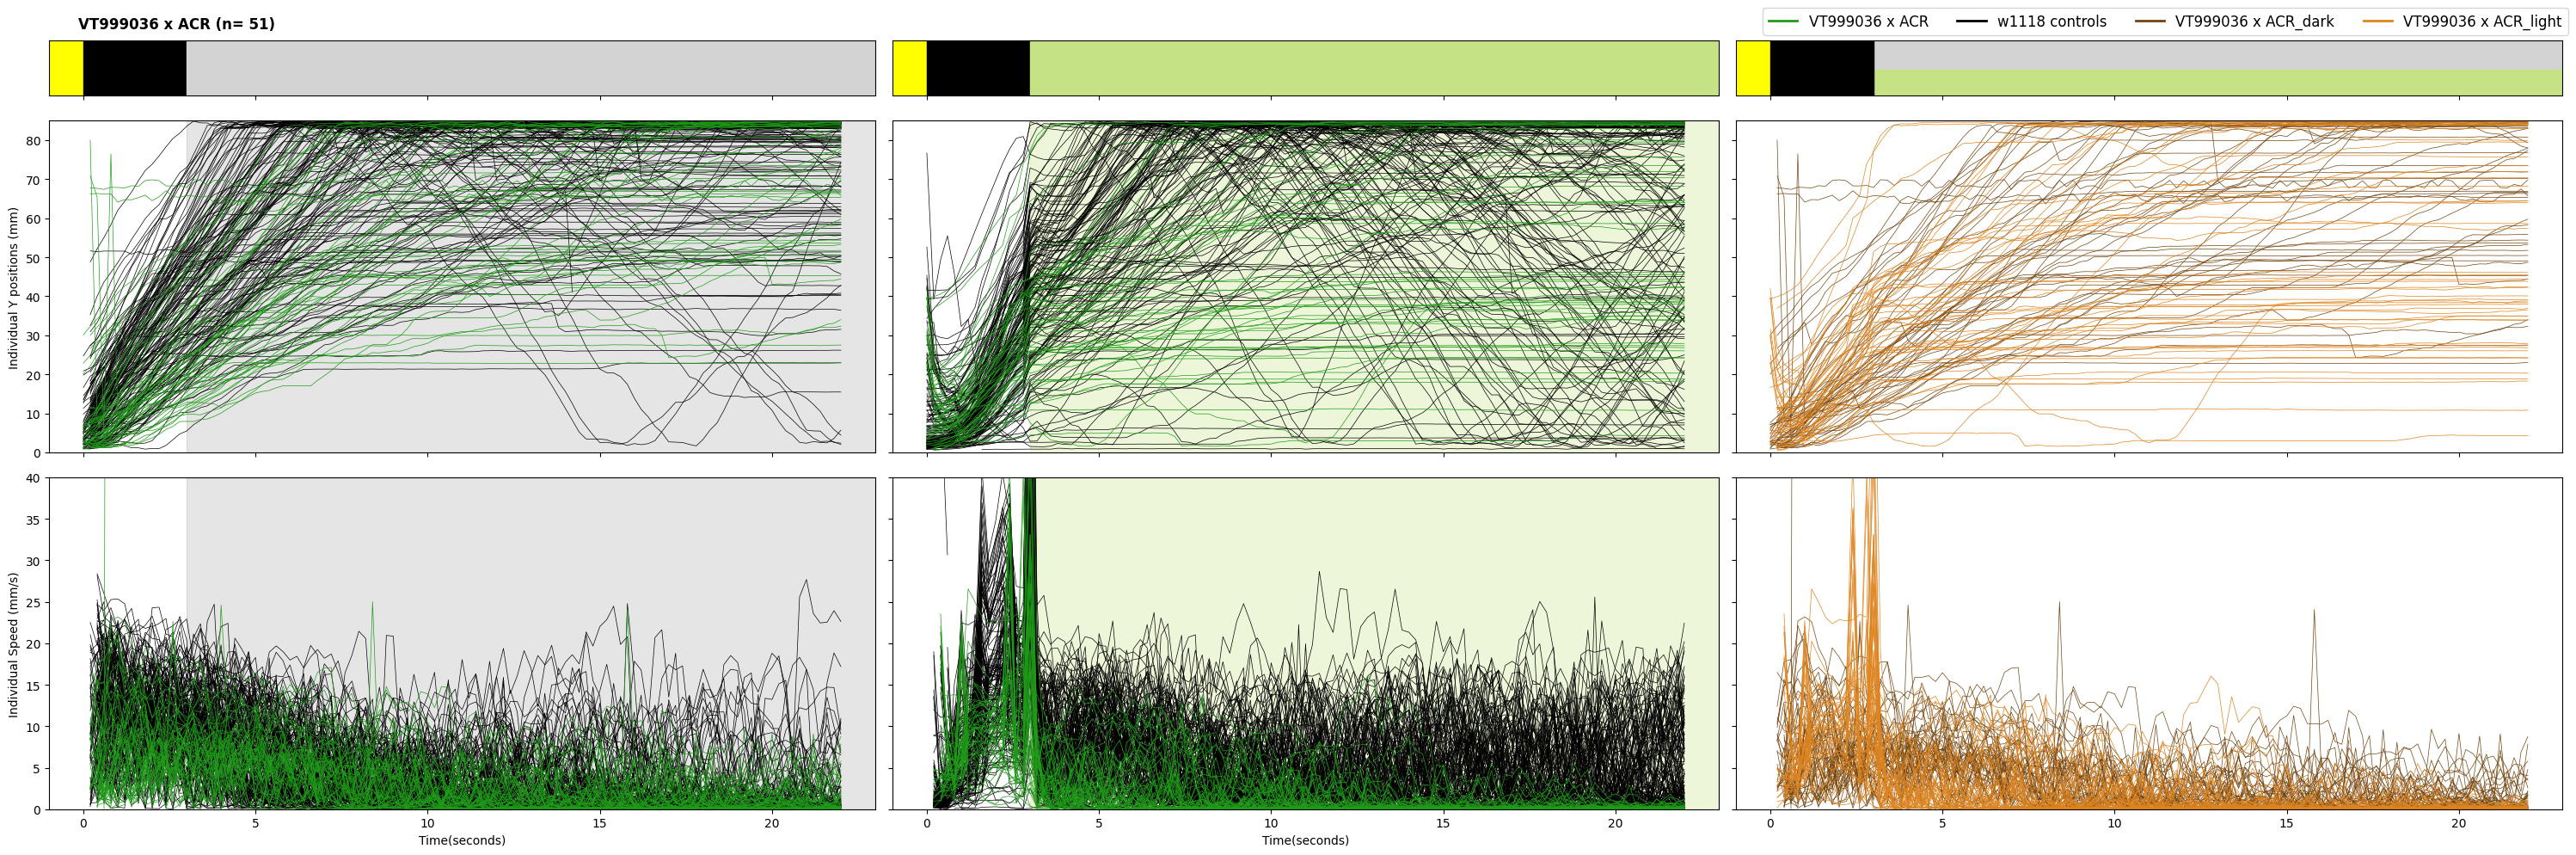

In [5]:
figthirdplot, axs = plt.subplots(3, 3, figsize=(30, 10 ),sharex = "col", gridspec_kw={'height_ratios': [1,6,6]}) #sharey = row

#dist
dfy_exptall_dark = removingextraline(df_de[df_de.ExperimentState =="Dark"])
dfy_exptall_full = removingextraline(df_de[df_de.ExperimentState =="Full"])
dfy_wtall_dark = removingextraline(df_dw[df_dw.ExperimentState =="Dark"])
dfy_wtall_full = removingextraline(df_dw[df_dw.ExperimentState =="Full"])

#speed
dfs_exptall_dark = removingextraline(df_se[df_se.ExperimentState =="Dark"])
dfs_exptall_full = removingextraline(df_se[df_se.ExperimentState =="Full"])
dfs_wtall_dark = removingextraline(df_sw[df_sw.ExperimentState =="Dark"])
dfs_wtall_full = removingextraline(df_sw[df_sw.ExperimentState =="Full"])


driver = transgenic
nnumber = int(0.20*(len(dfexpt.columns)-2))
nnumberwt = int(0.20*(len(dfwt.columns)-2))

if "ACR" in responder:
    barcolr = "#1f9c19"
    patchcolor = "#c5e384"
    compdark = "#73440f"
    complight = "#de841f"
    
    
if "Chrimson2" in responder:
    barcolr = "#c30010"
    patchcolor = "salmon"
    compdark = "#3A025B"
    complight = "#AF69ED"

#cartoon
axs[0,0].axvspan(-1,0, color = "#FFFF00", label = "_nolegend_")
axs[0,0].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,0].axvspan(3,23, color = "lightgray" , label = "_nolegend_")

axs[0,1].axvspan(-1,0, color = "#FFFF00" , label = "_nolegend_")
axs[0,1].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,1].axvspan(3,23, color = patchcolor, label = "_nolegend_")

axs[0,2].axvspan(-1,0, color = "#FFFF00" , zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(0,3, color = "#000000", zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(3,23, color = patchcolor, label = "_nolegend_")
axs[0,2].axhline(y=0.75, color='lightgray', linewidth =25, zorder = 1, label = "_nolegend_" )

axs[0,0].get_yaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
axs[0,2].get_yaxis().set_visible(False)

#y pos    

axs[1,0].axvspan(3,23, alpha=0.1, color = "#000000", label = "_nolegend_")
axs[1,0].plot(dfy_exptall_dark['Seconds'], dfy_exptall_dark.iloc[:,2:], color = barcolr, linewidth = 0.5, label = "driver", zorder = 2)
axs[1, 0].plot(dfy_wtall_dark['Seconds'], dfy_wtall_dark.iloc[:,2:], color = "#000000", linewidth =0.5, label = "w1118 controls", zorder = 1)
axs[1,0].set(xlabel='Time(seconds)', ylabel='Individual Y positions (mm)')
axs[1,1].set(xlabel='Time(seconds)')

axs[1,1].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")
axs[1,1].plot(dfy_exptall_full['Seconds'], dfy_exptall_full.iloc[:,2:],color = barcolr, linewidth = 0.5, label = "_nolegend_", zorder = 2)
axs[1,1].plot(dfy_wtall_full['Seconds'], dfy_wtall_full.iloc[:,2:], color = "#000000", linewidth =0.5, label = "_nolegend_", zorder = 1)

#together with differences

axs[1,2].plot(dfy_exptall_dark['Seconds'], dfy_exptall_dark.iloc[:,2:], color = compdark, linewidth = 0.5, label = "driver" + "_dark", zorder = 1)
axs[1,2].plot(dfy_exptall_full['Seconds'], dfy_exptall_full.iloc[:,2:], color = complight, linewidth = 0.5, label = "driver" + "_light", zorder = 2)

axs[1,0].set_ylim([0, 85])
axs[1,1].set_ylim([0, 85])
axs[1,2].set_ylim([0, 85])

#speed

axs[2,0].axvspan(3,23, alpha=0.1, color = "#000000", label = "_nolegend_")
axs[2,1].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[2,0].plot(dfs_exptall_dark['Seconds'], dfs_exptall_dark.iloc[:,2:], color = barcolr, linewidth = 0.5, label = "_nolegend_", zorder = 2)
axs[2,0].plot(dfs_wtall_dark['Seconds'], dfs_wtall_dark.iloc[:,2:], color = "#000000", linewidth =0.5, label = "_nolegend_", zorder = 1)
axs[2,0].set(xlabel='Time(seconds)', ylabel='Individual Speed (mm/s)')
axs[2,1].set(xlabel='Time(seconds)')

axs[2,1].plot(dfs_exptall_full['Seconds'], dfs_exptall_full.iloc[:,2:], color = barcolr, linewidth = 0.5,zorder = 2, label = "_nolegend_")
axs[2,1].plot(dfs_wtall_full['Seconds'], dfs_wtall_full.iloc[:,2:], color = "#000000", linewidth =0.5, zorder = 1, label = "_nolegend_")

#together with differences

axs[2,2].plot(dfs_exptall_dark['Seconds'], dfs_exptall_dark.iloc[:,2:], color = compdark, linewidth = 0.5, zorder = 1, label = "_nolegend_")
axs[2,2].plot(dfs_exptall_full['Seconds'], dfs_exptall_full.iloc[:,2:], color = complight, linewidth = 0.5, zorder = 2, label = "_nolegend_")

axs[2,0].set_ylim([0, 40])
axs[2,1].set_ylim([0, 40])
axs[2,2].set_ylim([0, 40])

#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-1,23])

    
figthirdplot.suptitle(t = driver  + " (n= " + str(nnumber) + ")", fontweight='bold', x = 0.07)

#legend
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color = barcolr, lw=2),
                Line2D([0], [0], color="#000000", lw=2),
                Line2D([0], [0], color=compdark, lw=2),
                Line2D([0], [0], color=complight, lw=2)]
labels = [driver, "w1118 controls", driver +"_dark", driver + "_light"]
figthirdplot.legend(custom_lines, labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=4, bbox_transform=figthirdplot.transFigure, prop={'size': 12})


figthirdplot.tight_layout()

figthirdplot.show()

## others

In [8]:
dfexpt.filter(regex='Velocity.*')

VT999036 Velocity_2  VT999036 Velocity_3  VT999036 Velocity_4  \
0                    NaN                  NaN                  NaN   
1               8.291790            10.212560             2.599164   
2               5.989678            15.668142             3.502472   
3              12.860809            12.607441             9.246713   
4              16.513153             6.489217            10.066973   
..                   ...                  ...                  ...   
325             0.098561             0.149638             0.492870   
326             0.076300             0.167629             0.519778   
327             0.138381             0.159086             0.111033   
328             0.046937             0.119206             0.626027   
329             0.112709             0.084073             1.972762   

     VT999036 Velocity_5  VT999036 Velocity_6  VT999036 Velocity_7  \
0                    NaN                  NaN                  NaN   
1               8.350516             3.329272                  NaN   
2              12.925865             7.406807             4.895458   
3              12.707204             5.346231             7.620129   
4              14.234228             4.485649             7.826838   
..                   ...                  ...                  ...   
325             0.230014             0.191940             0.457584   
326             0.082127             0.182420             0.250794   
327             0.115298             0.196100             0.180818   
328             0.200827             0.129000             0.478569   
329             0.110879             0.364975             0.324179   

     VT999036 Velocity_10  VT999036 Velocity_11  VT999036 Velocity_12  \
0                     NaN                   NaN                   NaN   
1                8.223759              7.067000              6.937712   
2               10.512631              2.556241              6.226339   
3               14.354148              4.462780              7.299644   
4               15.749177              2.108579              8.533211   
..                    ...                   ...                   ...   
325              0.496272              0.350225              0.341970   
326              0.324536              0.307506              0.519625   
327              0.100997              0.933005              0.192412   
328              0.096965              0.444527              0.110883   
329              0.192188              0.531418              0.575392   

     VT999036 Velocity_16  ...  VT999036 Velocity_65  VT999036 Velocity_66  \
0                     NaN  ...                   NaN                   NaN   
1                2.906974  ...                   NaN                   NaN   
2                3.836598  ...              8.957195                   NaN   
3                2.194631  ...              2.262324                   NaN   
4                2.872359  ...              1.453794                   NaN   
..                    ...  ...                   ...                   ...   
325              0.170227  ...              0.096795              0.171493   
326              0.278717  ...              0.043179              0.149878   
327              0.500042  ...              0.066911              0.131222   
328              0.238873  ...              0.162793              0.056070   
329              0.223268  ...                   NaN                   NaN   

     VT999036 Velocity_68  VT999036 Velocity_73  VT999036 Velocity_75  \
0                     NaN                   NaN                   NaN   
1                     NaN                   NaN                   NaN   
2                2.698043              0.851901                   NaN   
3                2.580854              1.329301              0.077444   
4                2.350052              2.744700            342.236186   
..                    ...                   ...                   ...  

In [9]:
def distpersec (dfexpt):
    import pandas as pd
    import numpy as np
    
    dfnewt = dfexpt.iloc[::5,:].reset_index(drop=True)
    dfnewt.drop(dfnewt.filter(regex='Fall_.*|Velocity_.*|Pausecount_.*').columns, axis=1, inplace=True)

    dfnewt3 = dfnewt.iloc[:,2:].copy()
    distsec = pd.DataFrame()
    for v2 in range(0,len(dfnewt3.columns),2):
        dfnewt4= pd.DataFrame()
        #assining name
        naming = (dfnewt3.iloc[:,v2]).name
        arraynum = naming.split("_")[1]
        
        dfnewt4 = pd.concat([dfnewt3.iloc[:,v2], dfnewt3.iloc[:,v2+1]], axis = 1)
        distsec["Dist_" + str(arraynum)] = np.linalg.norm(dfnewt4.diff(axis=0), axis=1)
    distsec = pd.concat([dfnewt.iloc[:,0:2], distsec], axis = 1).reset_index(drop=True)
    
    return distsec
    

In [10]:
# for dispplacement per sec
def sectioneddispchunks(chunklist, dfdist):
    import pandas as pd
    import numpy as np

    sliced = pd.DataFrame()
    for nn in chunklist:  
        nnum = round(nn,1)
        sliced = pd.concat([sliced, dfdist[dfdist['Seconds'] ==nnum]], axis = 0)
        
    df_slice = pd.DataFrame()   

    test = sliced.iloc[:,1:]
    for v2 in range(0,len(test.columns),3):
        dfnewt4= pd.DataFrame()
        naming = (test.iloc[:,v2]).name
        arraynum = naming.split("_")[1]   
        dfnewt4 = pd.concat([test.iloc[:,v2], test.iloc[:,v2+1]], axis = 1)
        if sum(test.iloc[:,v2+2])==0.0: #accounting if there is a fall, do not calculate displacement for that moment
            linalg_variable = np.linalg.norm(dfnewt4.diff(axis=0), axis=1)
            if np.nansum(linalg_variable) < 1.0:  #if sum of displacement events is less than 0, do not want
                df_slice["Disp_" + str(arraynum)] = np.nan
            else:
                df_slice["Disp_" + str(arraynum)] = linalg_variable
        else:
            df_slice["Disp_" + str(arraynum)] = np.nan

    df_slice2 = df_slice.sum(axis=0).to_frame().T
    return df_slice2
    

def disppersec(dftest):
    import pandas as pd
    import numpy as np
    import math
    distancevelo  = dftest.filter(regex='X_.*|Y_.*|Fall_.*')
    dfdist = pd.concat([round(dftest['Seconds'],1), distancevelo], axis =1)
    listsecondsnumber = list(range(int(dftest['Seconds'].iloc[0]),math.floor(dftest['Seconds'].iloc[-1])))
    df_sumdisp = pd.DataFrame()

    for n in listsecondsnumber:
        arraylist = list(np.linspace(n,n+1,6))
        df_sumdisp = pd.concat([df_sumdisp, sectioneddispchunks(arraylist, dfdist)], axis = 0).reset_index(drop=True)
        
    df_sumdisp = df_sumdisp.shift(periods=1)
    tempsecondslist = dftest.iloc[::5, 0:2].reset_index(drop=True)
    df_sumdisp = pd.concat([tempsecondslist, df_sumdisp], axis = 1).reset_index(drop=True)

    return df_sumdisp

In [50]:
sliced.iloc[:,1:]

VT999036 X_2  VT999036 Y_2  VT999036 Fall_2  VT999036 X_3  VT999036 Y_3  \
320       4.69910      85.21982              0.0       1.49954      83.74576   
321       4.74390      85.21170              0.0       1.50346      83.74464   
322       4.74236      85.21968              0.0       1.50920      83.75514   
323       4.68174      85.21968              0.0       1.53342      83.76788   
324       4.68930      85.20484              0.0       1.51760      83.78258   
325       4.70274      85.21926              0.0       1.49086      83.76914   

     VT999036 Fall_3  VT999036 X_4  VT999036 Y_4  VT999036 Fall_4  \
320              0.0       5.07206      55.27774              0.0   
321              0.0       4.96804      55.16518              0.0   
322              0.0       4.84750      55.09616              0.0   
323              0.0       4.86948      55.14334              0.0   
324              0.0       5.16810      55.11184              0.0   
325              0.0       5.06996      55.12108              0.0   

     VT999036 X_5  ...  VT999036 Fall_77  VT999036 X_79  VT999036 Y_79  \
320       1.92444  ...               0.0        5.03370       80.79386   
321       1.92374  ...               0.0        5.01970       80.79218   
322       1.93186  ...               0.0        5.02488       80.79092   
323       2.00452  ...               0.0        5.02166       80.80044   
324       1.95020  ...               0.0        5.02110       80.77860   
325       1.91436  ...               0.0        5.03174       80.76418   

     VT999036 Fall_79  VT999036 X_80  VT999036 Y_80  VT999036 Fall_80  \
320               0.0        2.74246       83.18772               0.0   
321               0.0        2.73560       83.18268               0.0   
322               0.0        2.77466       83.21628               0.0   
323               0.0        2.78642       83.18142               0.0   
324               0.0        2.82940       83.21530               0.0   
325               0.0        2.86258       83.23322               0.0   

     VT999036 X_81  VT999036 Y_81  VT999036 Fall_81  
320        2.89730       34.55704               0.0  
321        2.90150       34.54766               0.0  
322        2.88890       34.56040               0.0  
323        2.90066       34.55214               0.0  
324        2.93846       34.51434               0.0  
325        2.91998       34.52302               0.0  

[6 rows x 153 columns]

In [52]:
dfdist.iloc[:,1:]

VT999036 X_2  VT999036 Y_2  VT999036 Fall_2  VT999036 X_3  VT999036 Y_3  \
0         3.17590       6.22734              0.0       4.03186      22.85822   
1         2.75954       7.83258              0.0       4.06868      24.90040   
2         2.88316       9.02412              0.0       2.99838      27.84558   
3         3.60990      11.49148              0.0       2.14704      30.21900   
4         3.92000      14.77952              0.0       2.28340      31.50966   
..            ...           ...              ...           ...           ...   
325       4.70274      85.21926              0.0       1.49086      83.76914   
326       4.69000      85.22766              0.0       1.51816      83.78860   
327       4.71716      85.22234              0.0       1.51970      83.75682   
328       4.71996      85.23130              0.0       1.49646      83.76214   
329       4.69966      85.22150              0.0       1.49716      83.74534   

     VT999036 Fall_3  VT999036 X_4  VT999036 Y_4  VT999036 Fall_4  \
0                0.0       2.50852       2.88568              0.0   
1                0.0       2.84718       3.28006              0.0   
2                0.0       3.41712       2.87280              0.0   
3                0.0       3.13502       4.70050              0.0   
4                0.0       2.90472       6.70068              0.0   
..               ...           ...           ...              ...   
325              0.0       5.06996      55.12108              0.0   
326              0.0       4.97602      55.16560              0.0   
327              0.0       4.99254      55.15076              0.0   
328              0.0       4.95194      55.03232              0.0   
329              0.0       5.10384      54.66818              0.0   

     VT999036 X_5  ...  VT999036 Fall_77  VT999036 X_79  VT999036 Y_79  \
0         4.01618  ...               0.0            NaN            NaN   
1         3.85700  ...               0.0        4.83630        2.71376   
2         3.82382  ...               0.0        3.21272        4.43954   
3         3.94646  ...               0.0        2.41094        6.03050   
4         5.16992  ...               0.0        2.51006        6.09896   
..            ...  ...               ...            ...            ...   
325       1.91436  ...               0.0        5.03174       80.76418   
326       1.91968  ...               0.0        5.02124       80.78602   
327       1.94194  ...               0.0            NaN            NaN   
328       1.90414  ...               0.0            NaN            NaN   
329       1.92612  ...               0.0            NaN            NaN   

     VT999036 Fall_79  VT999036 X_80  VT999036 Y_80  VT999036 Fall_80  \
0                 0.0            NaN            NaN               0.0   
1                 0.0        6.86000       70.84000               0.0   
2                 0.0        6.85762       65.42508               1.0   
3                 0.0        3.01658        3.39290               1.0   
4                 0.0        4.05062        4.66942               0.0   
..                ...            ...            ...               ...   
325               0.0        2.86258       83.23322               0.0   
326               0.0        2.89072       83.21852               0.0   
327               0.0            NaN            NaN               0.0   
328               0.0            NaN            NaN               0.0   
329               0.0            NaN            NaN               0.0   

     VT999036 X_81  VT999036 Y_81  VT999036 Fall_81  
0              NaN            NaN               0.0  
1          2.57656        5.62086               0.0  
2          3.03898        7.98266               0.0  
3          3.55894        9.75604               0.0  
4          3.91916       11.54958               0.0  
..             ...            ...               ...  
325        2.91998       34.52302               0.0  
326        2.9155

In [54]:
linalg_variable

array([       nan, 0.01027737, 0.01791836, 0.01437098, 0.05345727,
       0.02041697])

In [60]:
differencemeter.iloc[:,1]

0          NaN
1          NaN
2      2.36180
3      1.77338
4      1.79354
        ...   
325    0.00868
326   -0.00868
327        NaN
328        NaN
329        NaN
Name: VT999036 Y_81, Length: 330, dtype: float64

In [82]:
nenew = dftest.filter(regex='X_.*|Y_.*|Fall_.*|Pausecount_.*')
ascdesc1 = pd.DataFrame()
for v2 in range(0,len(nenew.columns),4):
    # sumofnonimportantevents = pd.DataFrame()
    # sumofnonimportantevents['Falls and Pause'] = nenew.iloc[:,v2+2] + nenew.iloc[:,v2+3] #anything that is non pause/fall
    
    ascdesc1 = pd.concat([nenew.iloc[:,v2], nenew.iloc[:,v2+1]], axis=1)
    sumofnonimportantevents=pd.concat([ascdesc1.diff(axis=0), sumofnonimportantevents], axis = 1) 
print(sumofnonimportantevents)

     VT999036 X_81  VT999036 Y_81  Falls and Pause
0              NaN            NaN              0.0
1              NaN            NaN              0.0
2          0.46242        2.36180              0.0
3          0.51996        1.77338              0.0
4          0.36022        1.79354              0.0
..             ...            ...              ...
325       -0.01848        0.00868              1.0
326       -0.00448       -0.00868              1.0
327            NaN            NaN              0.0
328            NaN            NaN              0.0
329            NaN            NaN              0.0

[330 rows x 3 columns]


In [159]:
listofascnumbers = pd.DataFrame(0, index=np.arange(len(ascdesc1.diff(axis=0).iloc[:,1])), columns = ["Direction"])
listofdescnumbers = []

for n in range(len(ascdesc1.diff(axis=0).iloc[:,1])):
    # if math.isnan(ascdesc1.diff(axis=0).iloc[:,1][n]) == True:
    #     listofascnumbers.loc[(ascdesc1.diff(axis=0).iloc[:,1][n]), ['Direction']] = 0
        
    if ascdesc1.diff(axis=0).iloc[:,1][n] >= 0.1: #ascending
        listofascnumbers.loc[(n), ['Direction']] = 1
    if 
listofascnumbers


Direction
0            0
1            0
2            1
3            1
4            1
..         ...
325          0
326          0
327          0
328          0
329          0

[330 rows x 1 columns]

In [79]:
dftest = dfexpt.copy()
distancevelo  = dftest.filter(regex='X_.*|Y_.*|Fall_.*')
dfdist = pd.concat([round(dftest['Seconds'],1), distancevelo], axis =1)
listsecondsnumber = list(range(int(dftest['Seconds'].iloc[0]),math.floor(dftest['Seconds'].iloc[-1])))
df_sumdisp = pd.DataFrame()

        
df_slice = pd.DataFrame()   

test = dfdist.iloc[:,1:]
for v2 in range(0,len(test.columns),3):
    dfnewt4= pd.DataFrame()
    naming = (test.iloc[:,v2]).name
    arraynum = naming.split("_")[1]   
    dfnewt4 = pd.concat([test.iloc[:,v2], test.iloc[:,v2+1]], axis = 1)
    differencemeter = dfnewt4.diff(axis=0)
#and (differencemeter.iloc[:,1] >= 0.0).any()

    if (sum(test.iloc[:,v2+2])==0.0) : #accounting if there is a fall

        linalg_variable = np.linalg.norm(dfnewt4.diff(axis=0), axis=1) #calculates distance based on difference

        print(linalg_variable)

#         if np.nansum(linalg_variable) < 1.0:  #if sum of displacement events is less than 0, do not want
#             df_slice["Disp_" + str(arraynum)] = np.nan
#         else:
#             df_slice["Disp_" + str(arraynum)] = linalg_variable
#     else:
#         df_slice["Disp_" + str(arraynum)] = np.nan

# df_slice2 = df_slice.sum(axis=0).to_frame().T




# df_sumdisp = pd.concat([df_sumdisp, df_slice2], axis = 0).reset_index(drop=True)


# df_sumdisp = df_sumdisp.shift(periods=1)
# print(df_sumdisp)


# tempsecondslist = dftest.iloc[::5, 0:2].reset_index(drop=True)
# df_sumdisp = pd.concat([tempsecondslist, df_sumdisp], axis = 1).reset_index(drop=True)


In [80]:
differencemeter.iloc[:,1]

0          NaN
1          NaN
2      2.36180
3      1.77338
4      1.79354
        ...   
325    0.00868
326   -0.00868
327        NaN
328        NaN
329        NaN
Name: VT999036 Y_81, Length: 330, dtype: float64

In [24]:
differencemeter.iloc[:,1] >=0.0

0    False
1     True
2     True
3     True
4     True
5     True
Name: VT999036 Y_2, dtype: bool

In [23]:
differencemeter.iloc[:,1] 


0        NaN
1    1.60524
2    1.19154
3    2.46736
4    3.28804
5    3.50392
Name: VT999036 Y_2, dtype: float64

In [68]:
dfdf = pd.DataFrame()
dfdf['blob'] = [17,9,0,3]
dfdf['exec'] = [10,5,0,1]
np.linalg.norm(dfdf, axis=1)

array([19.72308292, 10.29563014,  0.        ,  3.16227766])

In [67]:
dfdf

blob  exec
0    17    10
1     9     5
2     0     0
3     3     1

In [60]:

kito = dfexpt[(dfexpt['ExperimentState']== "Dark")] 
disppersec (kito)

Seconds ExperimentState    Disp_2     Disp_3    Disp_4     Disp_5  \
0       3.0            Dark       NaN        NaN       NaN        NaN   
1       4.0            Dark  6.572842   6.449876  9.778125  15.046351   
2       5.0            Dark  8.596506  12.175576  6.425533  12.428570   
3       6.0            Dark  7.743439  10.700736  6.817906   9.617395   
4       7.0            Dark  8.272972   6.843920  8.953944   2.951889   
5       8.0            Dark  5.565453   1.519959  4.237104   1.622397   
6       9.0            Dark  5.603922   1.029259  0.000000   3.652558   
7      10.0            Dark  1.112736   0.000000  0.000000   1.043545   
8      11.0            Dark  0.000000   1.036464  0.000000   3.211497   
9      12.0            Dark  0.000000   0.000000  0.000000   3.051379   
10     13.0            Dark  0.000000   1.254526  0.000000   2.150839   
11     14.0            Dark  0.000000   0.000000  0.000000   1.017651   
12     15.0            Dark  0.000000   0.000000  0.000000   1.945893   
13     16.0            Dark  1.489170   0.000000  0.000000   1.135954   
14     17.0            Dark  0.000000   0.000000  0.000000   2.192319   
15     18.0            Dark  0.000000   0.000000  0.000000   1.718671   
16     19.0            Dark  0.000000   0.000000  0.000000   2.327500   
17     20.0            Dark  0.000000   0.000000  0.000000   1.259320   
18     21.0            Dark  0.000000   0.000000  0.000000   2.553713   
19     22.0            Dark       NaN        NaN       NaN        NaN   

      Disp_6    Disp_7    Disp_10   Disp_11  ...   Disp_65   Disp_66  \
0        NaN       NaN        NaN       NaN  ...       NaN       NaN   
1   5.837044  6.698751  11.389050  5.507981  ...  1.995459  4.777723   
2   6.926430  6.633999  10.093884  4.247226  ...  5.053435  4.076832   
3   6.295316  5.832145   4.170777  3.770442  ...  4.693694  6.219090   
4   4.249969  6.645270   9.884203  3.635431  ...  4.257125  4.971654   
5   0.000000  3.401176   7.837080  2.359860  ...  4.547504  1.384938   
6   0.000000  4.464725   8.865794  3.645631  ...  5.022381  0.000000   
7   0.000000  2.832750   5.986479  4.995031  ...  3.812843  0.000000   
8   0.000000  2.683828   0.000000  2.171368  ...  1.237870  0.000000   
9   2.058510  1.639517   1.272952  4.676364  ...  5.211040  0.000000   
10  0.000000  2.737077   1.608338  4.525914  ...  2.864981  3.775978   
11  0.000000  1.257083   1.855941  4.686364  ...  3.717707  4.306617   
12  0.000000  1.512480   2.021260  4.092904  ...  3.814780  0.000000   
13  0.000000  1.892500   1.217504  2.804883  ...  3.011598  0.000000   
14  0.000000  2.391725   1.153565  2.882060  ...  4.412516  2.932893   
15  0.000000  3.160480   2.583543  1.988915  ...  3.824749  6.691530   
16  2.714688  4.023363   1.303958  0.000000  ...  3.163964  6.981281   
17  4.103311  1.841694   2.043604  0.000000  ...  2.580288  3.832625   
18  2.004465  2.184289   0.000000  0.000000  ...  2.955171  4.518462   
19       NaN       NaN        NaN       NaN  ...       NaN       NaN   

     Disp_68   Disp_73   Disp_75   Disp_76   Disp_77    Disp_79    Disp_80  \
0        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
1   4.259131  4.856907  3.002389  2.621505  7.367480  14.972831   7.181784   
2   3.273217  5.149507  4.919617  5.063259  6.938785  15.947540   6.836755   
3   4.192215  3.644108  3.493849  2.855035  4.345070  13.906775  10.224879   
4   2.642653  4.560017  2.512630  2.649090  1.957041   6.786373   7.647281   
5   3.850169  4.184370  0.000000  3.138594  1.635356   0.000000   8.432865   
6   3.051499  7.919257  0.000000  5.103163  1.306499   0.000000   9.560663   
7   3.551498  3.959223  0.000000  3.548202  1.141937   0.000000   8.684631   
8   2.511526  3.007387  0.000000  3.103254  0.000000   1.840523   1.017676   
9   3.764257  5.748711  0.000000  4.967078  1.114884   1.675885   1.061865   
10  2.019241  5.303515  0.000000  3.635111  0.000000   0.000000   1.579760   
11  1.268184  4.00429

In [49]:
savelocation = openPath + "images\\"
fig.write_image(savelocation + "lineplot of " + transgenic +".jpg", scale=2)